Farutin Vadim

Homework03

In [1]:
import numpy as np
import operator
import csv

Reading datasets.

In [2]:
def read_spam():
    D = []
    
    with open('./Datasets/spam.csv', newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            row = list(map(float, row))
            D.append(np.array([np.array(row[:-1]), row[-1]]))

    return np.array(D)

In [3]:
def read_cancer():
    D = []
    
    with open('./Datasets/cancer.csv', newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            D.append(np.array([np.array(list(map(float, row[1:]))), row[0]]))

    return np.array(D)

In [5]:
def read_blobs2():
    D = []
    
    with open('./Datasets/blobs2.csv', newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            row = list(map(float, row))
            D.append(np.array([np.array(row[:-1]), row[-1]]))

    return np.array(D)

In [103]:
def read_smsspam():
    D = []
    
    with open('./Datasets/smsspam.csv', newline='', encoding="utf8") as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            D.append(np.array([row[1], row[0]]))

    return np.array(D)

In [7]:
def extract_labels(D):
    X = np.array([row[0] for row in D])
    Y = np.array([row[1] for row in D])
    
    return X, Y

In [8]:
from sklearn.model_selection import train_test_split

def split_dataset(D, train_size):
    X, Y = extract_labels(D)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, test_size=1 - train_size)
    D_train = np.array([[x_row, y_row] for x_row, y_row in zip(X_train, Y_train)])
    D_test = np.array([[x_row, y_row] for x_row, y_row in zip(X_test, Y_test)])
    
    return D_train, D_test

#### SVM

Dataset: blobs2.csv.

1. (3) Apply an SVM classifier (for example, from sklearn package) to blobs2.csv dataset and draw the result (both the support vectors and the separation hyperplane). Use the following kernels:
    1. Linear.
    * Polynomial, degree 2.
    * Polynomial, degree 3.
    * Polynomial, degree 5.
    * Radial Basis Function.

In [23]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [16]:
import matplotlib.pyplot as plt

# Most part of this code is taken from sklearn example:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def plot_svm(D, model, title):
    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, model, xx, yy, **params):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    X, Y = extract_labels(D)
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    fig, ax = plt.subplots()

    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20)
    ax.scatter(X0[model.support_], X1[model.support_], c=Y[model.support_], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)

    plt.show()

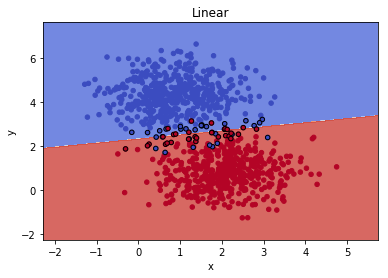

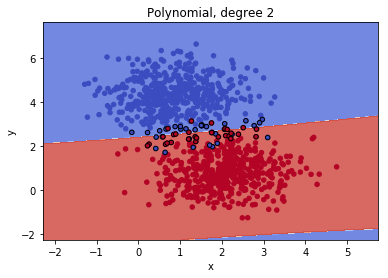

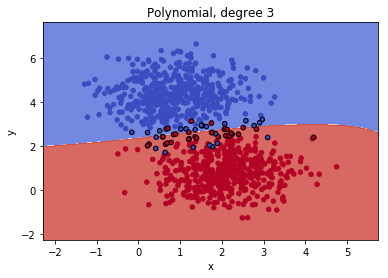

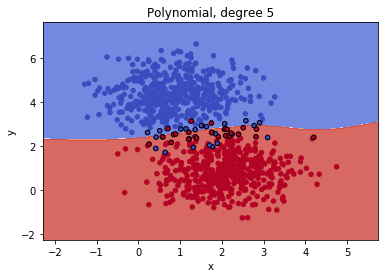

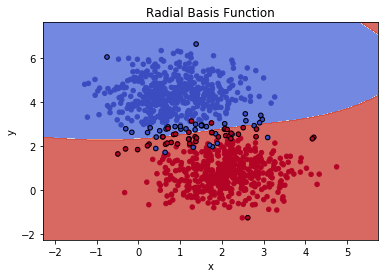

In [18]:
D = read_blobs2()
X, Y = extract_labels(D)

classifiers = [svm.SVC(kernel='linear', gamma='scale'),
               svm.SVC(kernel='poly', degree=2, gamma='scale'),
               svm.SVC(kernel='poly', degree=3, gamma='scale'),
               svm.SVC(kernel='poly', degree=5, gamma='scale'),
               svm.SVC(kernel='rbf', gamma='scale')]

models = [classifier.fit(X, Y) for classifier in classifiers]

titles = ['Linear',
          'Polynomial, degree 2',
          'Polynomial, degree 3',
          'Polynomial, degree 5',
          'Radial Basis Function']

for model, title in zip(models, titles):
    plot_svm(D, model, title)

Datasets: spam.csv and cancer.csv.

2. (3) Apply SVM and RandomForest methods to cancer.csv and spam.csv dataset. Compare training time with close performance on validation (20%).

In [19]:
import time

def fit(classifier, X, Y):
    start = time.time()
    classifier.fit(X, Y)
    end = time.time()
    
    return end - start

In [27]:
def compare_time(classifiers, titles, D, train_size):
    D_train, D_val = split_dataset(D, train_size)
    X_train, Y_train = extract_labels(D_train)
    X_val, Y_val = extract_labels(D_val)
    
    for classifier, title in zip(classifiers, titles):
        t = fit(classifier, X_train, Y_train)
        score = classifier.score(X_val, Y_val)
        print('Classifier: %s Time: %f Score: %f' % (title, t, score))

In [41]:
RANDOM_SEED = 42
classifiers = [svm.SVC(kernel='linear', random_state=RANDOM_SEED),
               RandomForestClassifier(n_estimators=10, max_depth=7, random_state=RANDOM_SEED)]
titles = ['SVM', 'RandomForest']
D = read_spam()
train_size = 0.8

print("Comparing on spam dataset")
compare_time(classifiers, titles, D, train_size)

Comparing on spam dataset
Classifier: SVM Time: 294.345438 Score: 0.940282
Classifier: RandomForest Time: 0.040048 Score: 0.925081


In [34]:
RANDOM_SEED = 42
classifiers = [svm.SVC(kernel='linear', random_state=RANDOM_SEED),
               RandomForestClassifier(n_estimators=10, max_depth=10, random_state=RANDOM_SEED)]
titles = ['SVM', 'RandomForest']
D = read_cancer()
train_size = 0.8

print("Comparing on cancer dataset")
compare_time(classifiers, titles, D, train_size)

Comparing on cancer dataset
Classifier: SVM Time: 2.334270 Score: 0.938596
Classifier: RandomForest Time: 0.025018 Score: 0.956140


SVM проигрывает по времени на два порядка.

#### Bayesian Classifier

Datasets: spam.csv and cancer.csv.

3. (6) Implement a Naive Bayesian Classifier with Gaussian features (no need for EM algorithm, sample mean and variance are sufficient for determining the parameters of a feature distribution) and apply it to spam.csv and cancer.csv.  
    Draw ROC-curves for scaled output probability (the output itself is quite small, so you should scale it in a way that sums up to 1 for a specific datapoint across all classes).

In [81]:
from scipy.stats import norm
from sklearn import metrics

In [79]:
class NBClassifier:
    def __init__(self):
        self.unique_labels = None
        self.class_P = None
        self.means = None
        self.stds = None

    def fit(self, X, Y):
        self.unique_labels, counts = np.unique(Y, return_counts=True)
        self.class_P = counts / len(Y)
        means = []
        stds = []
        
        for label in self.unique_labels:
            X_selected = X[Y == label, :]
            means.append(np.mean(X_selected, axis=0))
            stds.append(np.std(X_selected, axis=0))

        self.means = np.array(means)
        self.stds = np.array(stds)
    
    def scale_P(self, P):
        for i in range(len(P)):
            sum_P = np.sum(P[i])
            
            if sum_P != 0:
                P[i] = P[i] / sum_P
            else:
                P[i] = 0.5
                
        return P
    
    def predict(self, X):
        P = np.empty((len(X), len(self.unique_labels)))
        
        for label in range(len(self.unique_labels)):
            p = np.empty(X.shape)

            for i in range(X.shape[0]):
                for j in range(X.shape[1]):
                    p[i][j] = norm.pdf(X[i][j], 
                                       loc=self.means[label][j], 
                                       scale=self.stds[label][j])
            
            P[:, label] = self.class_P[label] * np.prod(p, axis=1) 

        return self.scale_P(P)
    
    def score(self, X, Y):
        P = self.predict(X)
        predicted_max_idx = np.argmax(P, axis=1)
        predicted_labels = self.unique_labels[predicted_max_idx]
        
        return np.mean(Y == predicted_labels)

In [82]:
def plot_curve(Y, p, pos_label):
    fpr, tpr, _ = metrics.roc_curve(Y, p, pos_label=pos_label)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()

0.9385964912280702


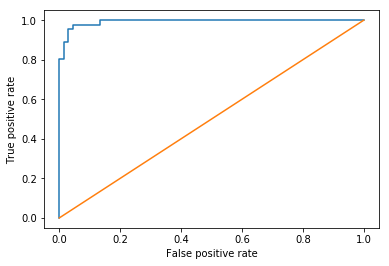

In [86]:
D = read_cancer()
train_size = 0.8
D_train, D_val = split_dataset(D, train_size)
X_train, Y_train = extract_labels(D_train)
X_val, Y_val = extract_labels(D_val)

classifier = NBClassifier()
classifier.fit(X_train, Y_train)

score = classifier.score(X_val, Y_val)
p = classifier.predict(X_val)[:, 1]
print(score)
plot_curve(Y_val, p, 'M')

0.8241042345276873


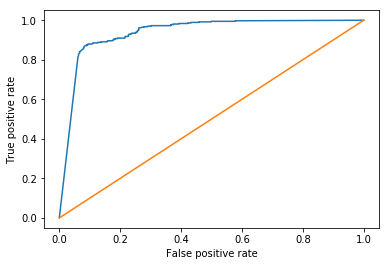

In [87]:
D = read_spam()
train_size = 0.8
D_train, D_val = split_dataset(D, train_size)
X_train, Y_train = extract_labels(D_train)
X_val, Y_val = extract_labels(D_val)

classifier = NBClassifier()
classifier.fit(X_train, Y_train)

score = classifier.score(X_val, Y_val)
p = classifier.predict(X_val)[:, 1]
print(score)
plot_curve(Y_val, p, 1)

Dataset: smsspam.csv

4. (6) Implement a Naive Bayesian Classifier with discrete features, i.e., numbers for dictionary words in the text in smsspam.csv dataset. So, if your dictionary is N words, each datapoint will have N features. Stemming is advised. Draw ROC-curves for scaled output probability.


In [98]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vadim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [124]:
class NBClassifierDiscrete:
    def __init__(self):
        self.unique_labels = None
        self.class_P = None
        self.word_frequency = None

    def stemm_row_words(self, row):
        words = nltk.tokenize.word_tokenize(row)
        stemmer = nltk.stem.PorterStemmer() 
        stemmed_words = [stemmer.stem(word) for word in words]

        return stemmed_words

    def stemm_all_words(self, X):
        return np.array([word 
                         for row in X
                         for word in self.stemm_row_words(row)])

    def fit(self, X, Y):
        self.unique_labels, counts = np.unique(Y, return_counts=True)
        self.class_P = counts / len(Y)

        all_words = self.stemm_all_words(X)
        unique_words = np.unique(all_words)
        word_dict = {unique_words[i]: i for i in range(len(unique_words))}
        word_frequency = []

        for label in self.unique_labels:
            selected_words = self.stemm_all_words(X[Y == label])
            word_frequency.append(np.array([np.sum(selected_words == word) for word in unique_words]))
        
        self.word_frequency = np.array(word_frequency)
        self.word_dict = word_dict
    
    def scale_P(self, P):
        for i in range(len(P)):
            sum_P = np.sum(P[i])
            
            if sum_P != 0:
                P[i] = P[i] / sum_P
            else:
                P[i] = 0.5
                
        return P
        
    def predict(self, X):
        X = np.array([self.stemm_row_words(row) for row in X])
        P = np.empty((len(X), len(self.unique_labels)))
        
        for label in range(len(self.unique_labels)):
            words_cnt = np.sum(self.word_frequency[label]) + len(self.word_dict)
            
            for i in range(len(X)):
                p = 1
                
                for j in range(len(X[i])):
                    if X[i][j] in self.word_dict:
                        k = self.word_dict[X[i][j]]
                        p *= (self.word_frequency[label][k] + 1) / words_cnt
                
                P[i][label] = self.class_P[label] * p
        
        return self.scale_P(P)
    
    def score(self, X, Y):
        P = self.predict(X)
        predicted_max_idx = np.argmax(P, axis=1)
        predicted_labels = self.unique_labels[predicted_max_idx]
        
        return np.mean(Y == predicted_labels)

In [125]:
D = read_smsspam()
train_size = 0.8
D_train, D_val = split_dataset(D, train_size)
X_train, Y_train = extract_labels(D_train)
X_val, Y_val = extract_labels(D_val)

In [126]:
classifier = NBClassifierDiscrete()
classifier.fit(X_train, Y_train)

0.9820627802690582


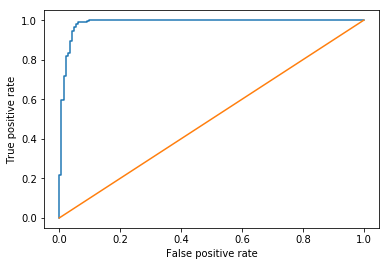

In [127]:
score = classifier.score(X_val, Y_val)
p = classifier.predict(X_val)[:, 0]
print(score)
plot_curve(Y_val, p, 'ham')